In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# #1

In [3]:
water = pd.read_csv("water.txt", header = 0, sep = '\t')
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [11]:
water.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [10]:
np.round(water.corr().iloc[0, 1], 4)

-0.6548

# #2

In [12]:
np.round(water.corr(method = 'spearman').iloc[0, 1], 4)

-0.6317

# #3

In [19]:
north = water[water.location == 'North']
south = water[water.location == 'South']

In [23]:
print('north corr = %.4f' %np.round(north.corr().iloc[0, 1], 4))
print('south corr = %.4f' %np.round(south.corr().iloc[0, 1], 4))

north corr = -0.3686
south corr = -0.6022


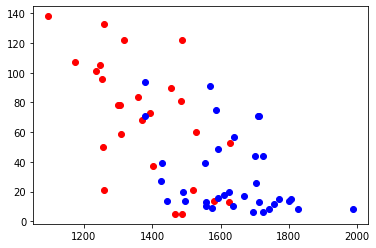

In [28]:
plt.scatter(south.mortality.values, south.hardness.values, c = 'r')
plt.scatter(north.mortality.values, north.hardness.values, c = 'b')


# #4

In [30]:
a = 718
b = 515
c = 203
d = 239

mat_cor = (a * d - b * c) / np.sqrt((a + b) * (a + c) * (d + b) * (d + c))
np.round(mat_cor, 4)

0.109

# #5

In [31]:
from scipy import stats as sts

In [33]:
observed = np.array([[718, 515], [203, 239]])
sts.chi2_contingency(observed)

(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[677.96597015, 555.03402985],
        [243.03402985, 198.96597015]]))

In [37]:
chi2 = sts.chi2_contingency(observed)[0]
chi2 / (a + b + c + d)

0.011586585545398828

# #6

In [40]:
p_fem = (c / (a + c))
p_m = (d / (b + d))

In [42]:
z = sts.norm.ppf(0.975)

left = (p_m - p_fem) - z * np.sqrt(p_m * (1 - p_m) / (b + d) + p_fem * (1 - p_fem) / (a + c))
right = (p_m - p_fem) + z * np.sqrt(p_m * (1 - p_m) / (b + d) + p_fem * (1 - p_fem) / (a + c))

print('95%% confidence interval for the p_m - p_fem = [%f, %f]' %(left, right))
print(np.round(left, 4))

95% confidence interval for the p_m - p_fem = [0.053905, 0.139222]
0.0539


# #7

In [43]:
P = (p_m * (b + d) + (p_fem) * (a + c)) / (a + b + c + d)
Z = (p_m - p_fem) / np.sqrt(P * (1 - P) * (1 / (a + c) + 1 / (b + d)))

p_value = 2 * (1 - sts.norm.cdf(abs(Z)))
p_value

8.153453089576601e-06

# #8

In [52]:
survey = np.array([[197, 111, 33], [382, 685, 331], [110, 342, 333]])

chi2 = sts.chi2_contingency(survey)[0]

# #9

In [46]:
p_value = sts.chi2_contingency(servey)[1]
p_value

2.4964299580093467e-62

# #10

In [53]:
n = np.sum(survey)

koef = np.sqrt(chi2 / (n * 2))
np.round(koef, 4)

0.2412